# Métricas de modelos de classificação


---


[documentação](https://scikit-learn.org/stable/index.html) <br>
dataset: [fonte](https://www.kaggle.com/datasets/dinhanhx/studentgradepassorfailprediction)

---

>[Métricas de modelos de classificação](#scrollTo=QoBv84MIUa-h)

>>[1. Vamos começar por importar os packages e o dataset](#scrollTo=HO6jdFDmldaU)

>>[2. Vamos explorar o dataset](#scrollTo=2S0UrVDEf8E-)

>>[3. Vamos dividir em treino e teste com a ajuda do scikit-learn](#scrollTo=VlyljBsUgD8D)

>>[4. Vamos aplicar o modelo KNN](#scrollTo=rBbqqMS5hXRe)

>>[5. Vamos aplicar o modelo de regressão logística](#scrollTo=Z-_Mfy5StNhM)

>>[6. Vamos obter as métricas de classificação](#scrollTo=q1AhrqhK6Aea)

>>>[6.1. matriz de confusão](#scrollTo=bt4CbYHc7h3U)

>>>[6.2. curva ROC e métrica AUC](#scrollTo=kRans4wO7fTR)



## 1.&nbsp;Vamos começar por importar os packages e o dataset

In [3]:
# packages gerais
import pandas as pd
import numpy as np

# dataset
df_students = pd.read_csv("C:/Users/yfreitas/Documents/pythonSamples/Machine Learning/Files/student-mat-pass-or-fail.csv")

## 2.&nbsp;Vamos explorar o dataset

In [4]:
# exploração inicial
df_students.head()
# df_students.info()
# df_students.shape
# df_students.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass
0,1,1,18,1,0,0,4,4,2,2,...,3,4,1,1,3,6,5,6,6,0
1,1,1,17,1,0,1,1,1,1,2,...,3,3,1,1,3,4,5,5,6,0
2,1,1,15,1,1,1,1,1,1,2,...,3,2,2,3,3,10,7,8,10,1
3,1,1,15,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,15,1
4,1,1,16,1,0,1,3,3,1,2,...,3,2,1,2,5,4,6,10,10,1


## 3.&nbsp;Vamos dividir em treino e teste com a ajuda do scikit-learn

In [5]:
# definimos a variável alvo
target_variable = "pass"

# train_test split usando a função train_test_split
X = df_students.drop(["G3", target_variable], axis = 1)
y = df_students[target_variable]
y.sum()/len(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 12,
                                                    stratify = y)


## 4.&nbsp;Vamos aplicar o modelo KNN

In [6]:
# importamos o modelo
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# para verificar a accuracy do modelo aplicamos a função .score
knn.score(X_test, y_test)

0.8991596638655462

## 5.&nbsp;Vamos aplicar o modelo de regressão logística

In [7]:
# importamos o modelo
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression( max_iter = 250)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# para verificar a accuracy do modelo aplicamos a função .score
log_reg.score(X_test, y_test)

0.9663865546218487

## 6.&nbsp;Vamos obter as métricas de classificação



### 6.1.&nbsp;matriz de confusão

Para relembrar: <br>
[TP FN <br>
 FP TN]

Accuracy -> (𝑇𝑃+𝑇𝑁)/(𝑃+𝑁)<br>
Precision -> 𝑇𝑃/(𝑇𝑃+𝐹𝑃)<br>
Recall, Hit rate ou TPR -> 𝑇𝑃/(𝑇𝑃+𝐹𝑁)<br>
Fall-out ou FPR -> 𝐹𝑃/(𝐹𝑃+𝑇𝑁)<br>

In [8]:
# importamos os módulos que precisamos
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# vamos ver as métricas para o KNN
rótulos = ['chumbou', 'passou']
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn, target_names = rótulos))
# vamos ver as métricas para a regressão logística
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg, target_names = rótulos))

[[32  7]
 [ 5 75]]
              precision    recall  f1-score   support

     chumbou       0.86      0.82      0.84        39
      passou       0.91      0.94      0.93        80

    accuracy                           0.90       119
   macro avg       0.89      0.88      0.88       119
weighted avg       0.90      0.90      0.90       119

[[36  3]
 [ 1 79]]
              precision    recall  f1-score   support

     chumbou       0.97      0.92      0.95        39
      passou       0.96      0.99      0.98        80

    accuracy                           0.97       119
   macro avg       0.97      0.96      0.96       119
weighted avg       0.97      0.97      0.97       119



In [9]:
# vamos analisar melhor os resultados
n_positives = y_test.sum()
n_negatives = len(y_test) - y_test.sum()
print(n_positives, n_negatives)

80 39


### 6.2.&nbsp;curva ROC e métrica AUC

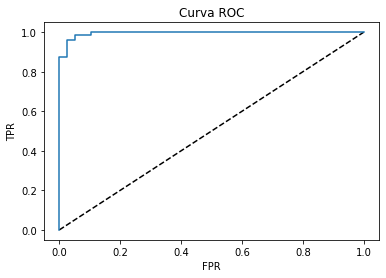

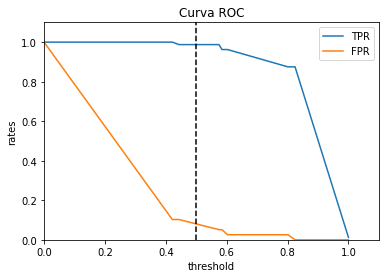

In [10]:
# importamos a curva roc
from sklearn.metrics import roc_curve

# Calculamos as probabilidades previstas (.predict_proba)
log_reg.predict_proba(X_test)
y_pred_log_reg_prob = log_reg.predict_proba(X_test)[:,1] # escolhemos a segunda coluna

# Vamos gerar a curva ROC
FPR, TPR, thresholds = roc_curve(y_test, y_pred_log_reg_prob)

# Vamos visualizar a curva
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(FPR, TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC')
plt.show()

# vamos visualisar a influência do threshold
plt.xlim(0,1.1)
plt.ylim(0,1.1)
plt.plot(thresholds[1:], TPR[1:])
plt.plot(thresholds[1:], FPR[1:])
plt.plot([0.5, 0.5], [0, 1.1], 'k--')
plt.xlabel('threshold')
plt.ylabel('rates')
plt.legend(['TPR', 'FPR'])
plt.title('Curva ROC')
plt.show()

In [13]:
log_reg.predict(X_test)

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [15]:
log_reg.predict_proba(X_test)

array([[6.65505760e-01, 3.34494240e-01],
       [9.25986416e-01, 7.40135841e-02],
       [7.69610921e-02, 9.23038908e-01],
       [2.02139281e-02, 9.79786072e-01],
       [7.43072222e-01, 2.56927778e-01],
       [9.99999975e-01, 2.45647887e-08],
       [1.69949204e-03, 9.98300508e-01],
       [4.60566667e-02, 9.53943333e-01],
       [2.50084910e-05, 9.99974992e-01],
       [1.66799630e-01, 8.33200370e-01],
       [5.78575901e-01, 4.21424099e-01],
       [3.76963638e-01, 6.23036362e-01],
       [9.15527633e-03, 9.90844724e-01],
       [1.99094476e-01, 8.00905524e-01],
       [2.89310838e-02, 9.71068916e-01],
       [7.43314691e-07, 9.99999257e-01],
       [6.93537928e-03, 9.93064621e-01],
       [9.99977729e-01, 2.22705434e-05],
       [9.99999842e-01, 1.57814331e-07],
       [8.02303757e-04, 9.99197696e-01],
       [9.99967183e-01, 3.28171786e-05],
       [4.75214589e-01, 5.24785411e-01],
       [1.99158528e-01, 8.00841472e-01],
       [4.15731261e-01, 5.84268739e-01],
       [9.996799

In [11]:
# vamos calcular a AUC
from sklearn.metrics import roc_auc_score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_log_reg_prob)))

AUC: 0.9951923076923077
